In [280]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import PIL
import skimage.filters
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as display
import skimage
import skimage.feature

from bilateral_filter import normalize, rgb_to_intensity, create_grids, process_grids_gaussian, slicing
from utils import display_img, load_img, rgb_to_intensity, detect_edge

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def bilateral_filter_img(input_img, Sd, NbBuckets, sigma):
    I = normalize(rgb_to_intensity(input_img)) * NbBuckets
    grids = create_grids(input_img, I, Sd, NbBuckets)
    grids = process_grids_gaussian(grids, sigma=sigma)
    return slicing(input_img, I, Sd, grids)

In [3]:
input_img = load_img('img/before.png')
input_img_gaussian_1 = skimage.filters.gaussian(input_img, sigma=1)
input_img_gaussian_2 = skimage.filters.gaussian(input_img, sigma=2)

/Users/roman/anaconda3/lib/python3.6/site-packages/skimage/filters/_gaussian.py:108: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  warn(RuntimeWarning(msg))


In [4]:
%%time
input_img_3_5_05 = bilateral_filter_img(input_img, Sd=3, NbBuckets=5, sigma=0.5)
input_img_5_5_05 = bilateral_filter_img(input_img, Sd=5, NbBuckets=5, sigma=0.5)
input_img_10_5_05 = bilateral_filter_img(input_img, Sd=10, NbBuckets=5, sigma=0.5)
input_img_3_5_1 = bilateral_filter_img(input_img, Sd=3, NbBuckets=5, sigma=1)
input_img_3_2_05 = bilateral_filter_img(input_img, Sd=3, NbBuckets=2, sigma=0.5)
input_img_3_10_05 = bilateral_filter_img(input_img, Sd=3, NbBuckets=10, sigma=0.5)

CPU times: user 8.43 s, sys: 49.6 ms, total: 8.47 s
Wall time: 8.49 s


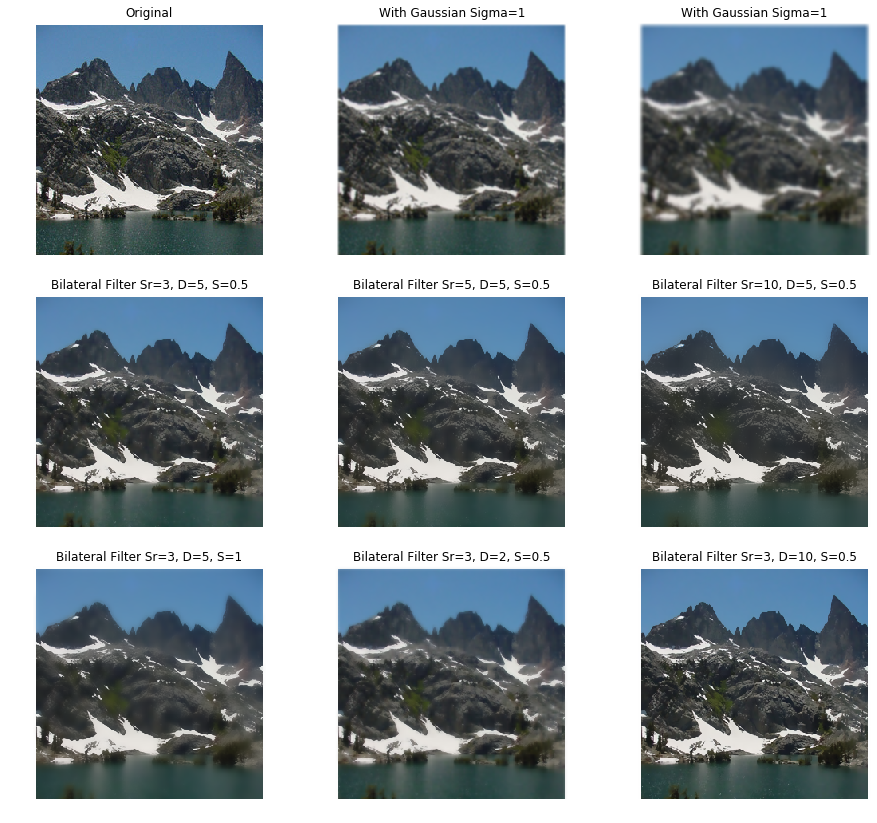

In [70]:
f, axs = plt.subplots(3, 3, figsize=(15,15))
f.subplots_adjust(wspace=0.3, hspace=0)
[ax.set_axis_off() for ax in axs.ravel()]
axs[0,0].imshow(input_img)
axs[0,0].set_title("Original")
axs[0,1].imshow(input_img_gaussian_1)
axs[0,1].set_title("With Gaussian Sigma=1")
axs[0,2].imshow(input_img_gaussian_2)
axs[0,2].set_title("With Gaussian Sigma=1")
axs[1,0].imshow(input_img_3_5_05)
axs[1,0].set_title("Bilateral Filter Sr=3, D=5, S=0.5")
axs[1,1].imshow(input_img_5_5_05)
axs[1,1].set_title("Bilateral Filter Sr=5, D=5, S=0.5")
axs[1,2].imshow(input_img_10_5_05)
axs[1,2].set_title("Bilateral Filter Sr=10, D=5, S=0.5")
axs[2,0].imshow(input_img_3_5_1)
axs[2,0].set_title("Bilateral Filter Sr=3, D=5, S=1")
axs[2,1].imshow(input_img_3_2_05)
axs[2,1].set_title("Bilateral Filter Sr=3, D=2, S=0.5")
axs[2,2].imshow(input_img_3_10_05)
axs[2,2].set_title("Bilateral Filter Sr=3, D=10, S=0.5");

In [56]:
lenna_img = load_img('img/lenna.png')
bf_lenna_img = bilateral_filter_img(lenna_img, Sd=3, NbBuckets=20, sigma=1)

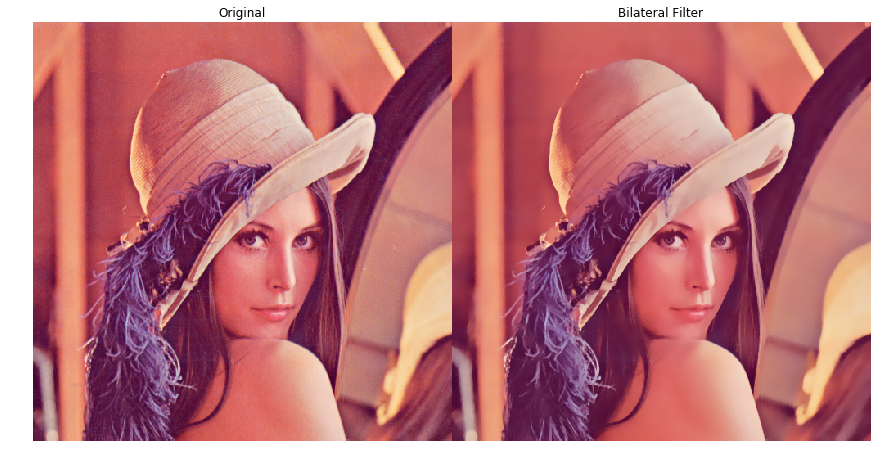

In [57]:
f, axs = plt.subplots(1, 2, figsize=(15,15))
f.subplots_adjust(wspace=0, hspace=0)
[ax.set_axis_off() for ax in axs.ravel()]
axs[0].imshow(lenna_img)
axs[0].set_title("Original")
axs[1].imshow(bf_lenna_img)
axs[1].set_title("Bilateral Filter");

In [63]:
bf_lenna_img2 = bilateral_filter_img(bf_lenna_img, Sd=3, NbBuckets=20, sigma=1)
bf_lenna_img3 = bilateral_filter_img(bf_lenna_img2, Sd=3, NbBuckets=20, sigma=1)
bf_lenna_img4 = bilateral_filter_img(bf_lenna_img3, Sd=3, NbBuckets=20, sigma=1)
bf_lenna_img5 = bilateral_filter_img(bf_lenna_img4, Sd=3, NbBuckets=20, sigma=1)

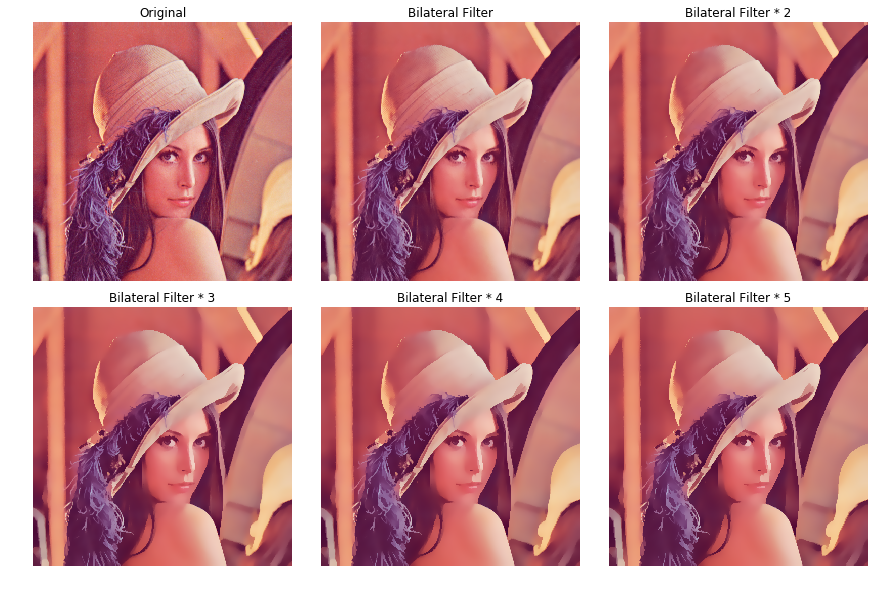

In [69]:
f, axs = plt.subplots(2, 3, figsize=(15,10))
f.subplots_adjust(wspace=0.1, hspace=0.1)
[ax.set_axis_off() for ax in axs.ravel()]
axs = axs.ravel()
axs[0].imshow(lenna_img)
axs[0].set_title("Original")
axs[1].imshow(bf_lenna_img)
axs[1].set_title("Bilateral Filter");
axs[2].imshow(bf_lenna_img2)
axs[2].set_title("Bilateral Filter * 2")
axs[3].imshow(bf_lenna_img3)
axs[3].set_title("Bilateral Filter * 3");
axs[4].imshow(bf_lenna_img4)
axs[4].set_title("Bilateral Filter * 4")
axs[5].imshow(bf_lenna_img5)
axs[5].set_title("Bilateral Filter * 5");

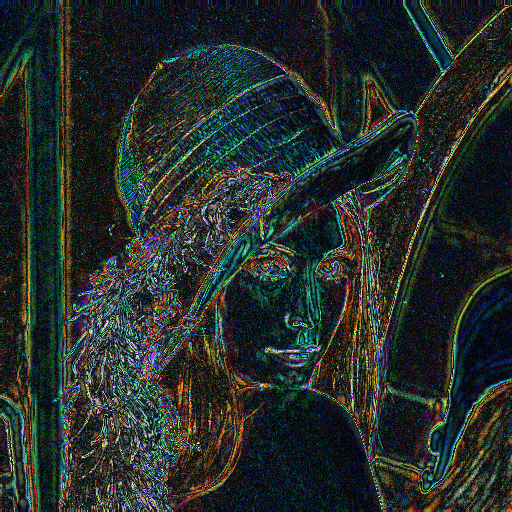

In [84]:
display_img(np.abs(lenna_img - bf_lenna_img5) * 7)

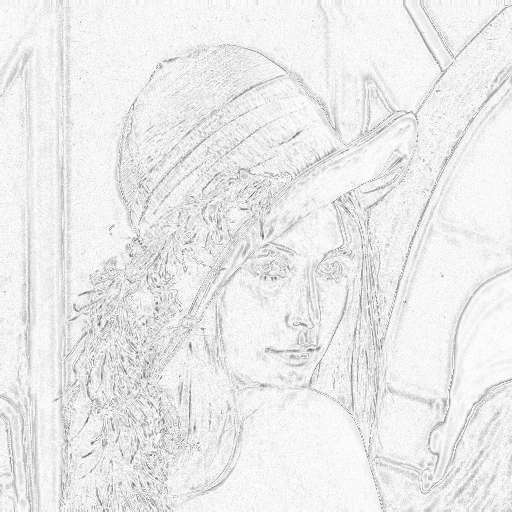

In [102]:
lenna_i_noise = rgb_to_intensity(np.abs(lenna_img - bf_lenna_img5) * 3)
display_img(1 - lenna_i_noise)

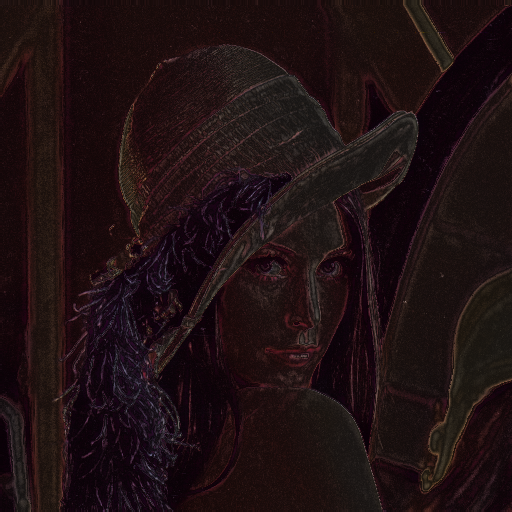

In [207]:
display_img(lenna_img * (0.1 + (lenna_i_noise).reshape(512, 512, 1)))

## Real-Time Video Abstraction
http://holgerweb.net/PhD/Research/papers/videoabstraction.pdf

In [240]:
def bilateral_filter_img_l(input_img, Sd, NbBuckets, sigma):
    L = np.copy(input_img[:,:,0])
    I = normalize(L) * NbBuckets
    grids = create_grids(input_img, I, Sd, NbBuckets)
    grids = process_grids_gaussian(grids, sigma=sigma)
    return slicing(input_img, I, Sd, grids)

In [241]:
lenna_lab = skimage.color.rgb2lab(lenna_img)
lenna_lab = bilateral_filter_img_l(lenna_lab, 5, 5, 0.5)
lenna_lab = bilateral_filter_img_l(lenna_lab, 5, 5, 0.5)

In [277]:
Ls = 10
L_to_quatization = np.copy(lenna_lab[:,:,0])
L_to_quatization = np.round(L_to_quatization / Ls) * Ls

In [278]:
lenna_lab_quatization = np.copy(lenna_lab)
lenna_lab_quatization[:,:,0] = L_to_quatization

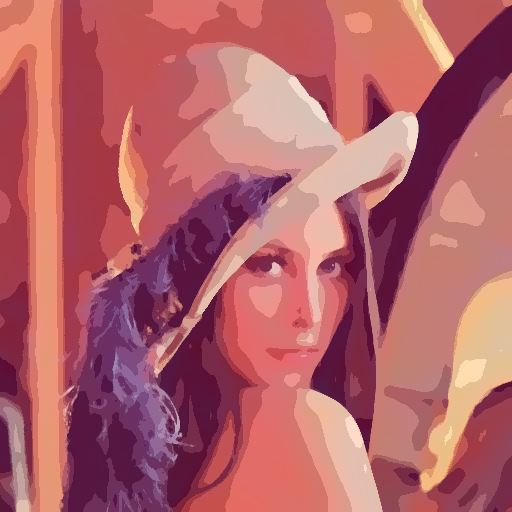

In [279]:
display_img(skimage.color.lab2rgb(lenna_lab_quatization))

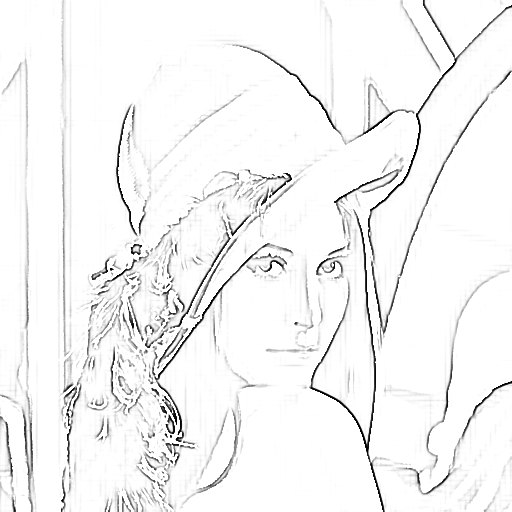

In [302]:
l_edges = detect_edge(lenna_lab[:,:,0], 0.75, 0.9999, 1.0)
display_img(l_edges)

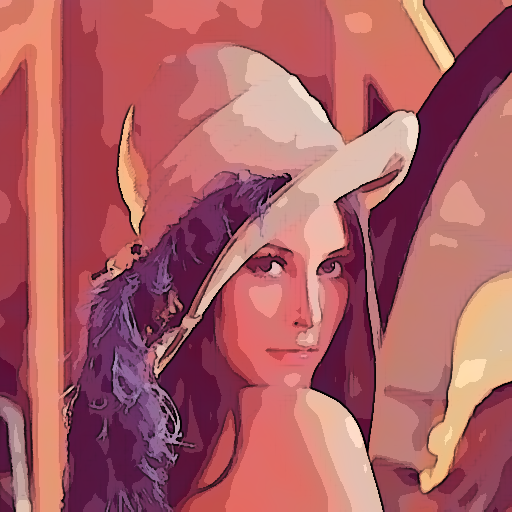

In [314]:
increase_edge_contrast = lenna_lab_quatization * l_edges.reshape(512, 512, 1)
display_img(skimage.color.lab2rgb(increase_edge_contrast))

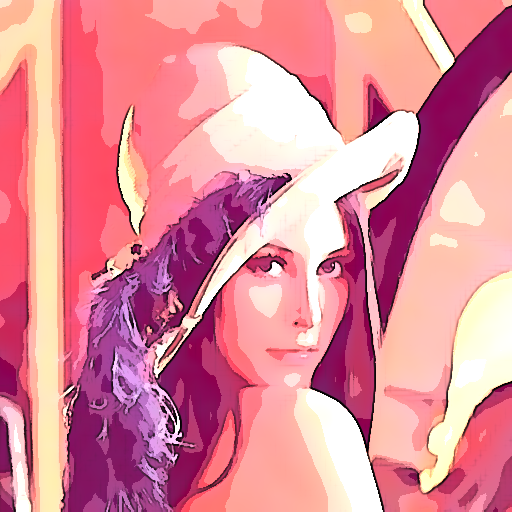

In [315]:
increase_edge_contrast = lenna_lab_quatization * 1.5 * l_edges.reshape(512, 512, 1)
display_img(skimage.color.lab2rgb(increase_edge_contrast))

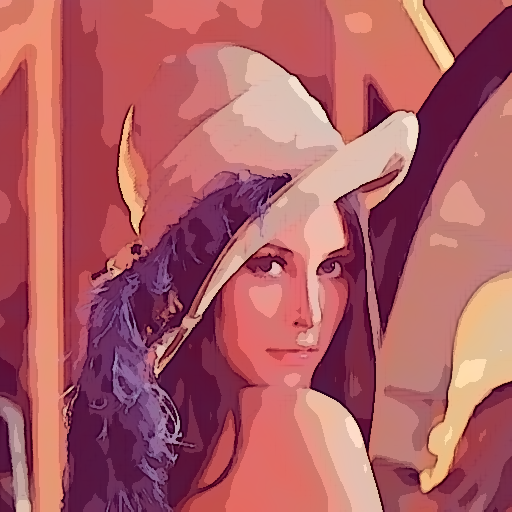

In [317]:
increase_edge_contrast = np.copy(lenna_lab_quatization)
increase_edge_contrast[:,:,0] *= l_edges.reshape(512, 512)
display_img(skimage.color.lab2rgb(increase_edge_contrast))

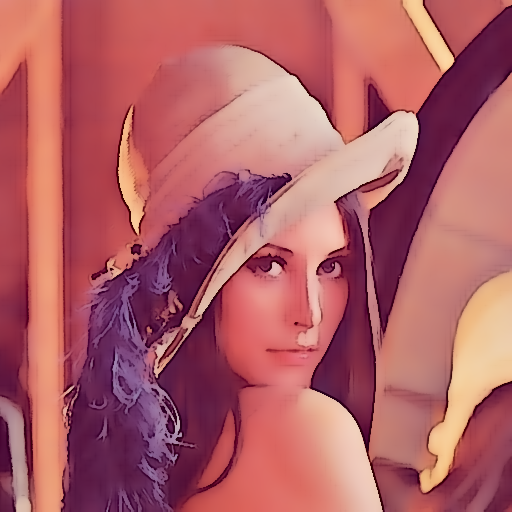

In [318]:
increase_edge_contrast = np.copy(lenna_lab)
increase_edge_contrast[:,:,0] *= l_edges.reshape(512, 512)
display_img(skimage.color.lab2rgb(increase_edge_contrast))

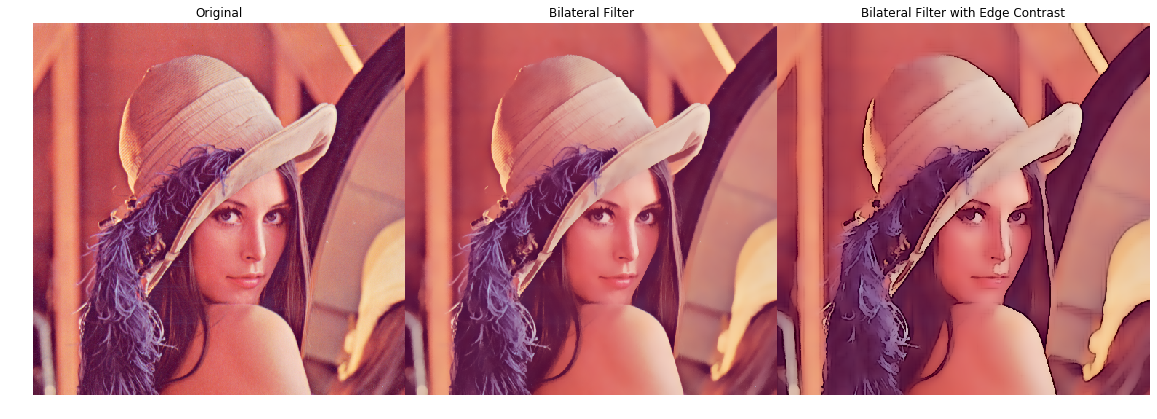

In [321]:
f, axs = plt.subplots(1, 3, figsize=(20,15))
f.subplots_adjust(wspace=0, hspace=0)
[ax.set_axis_off() for ax in axs.ravel()]
axs[0].imshow(lenna_img)
axs[0].set_title("Original")
axs[1].imshow(bf_lenna_img)
axs[1].set_title("Bilateral Filter");
axs[2].imshow(skimage.color.lab2rgb(increase_edge_contrast))
axs[2].set_title("Bilateral Filter with Edge Contrast");